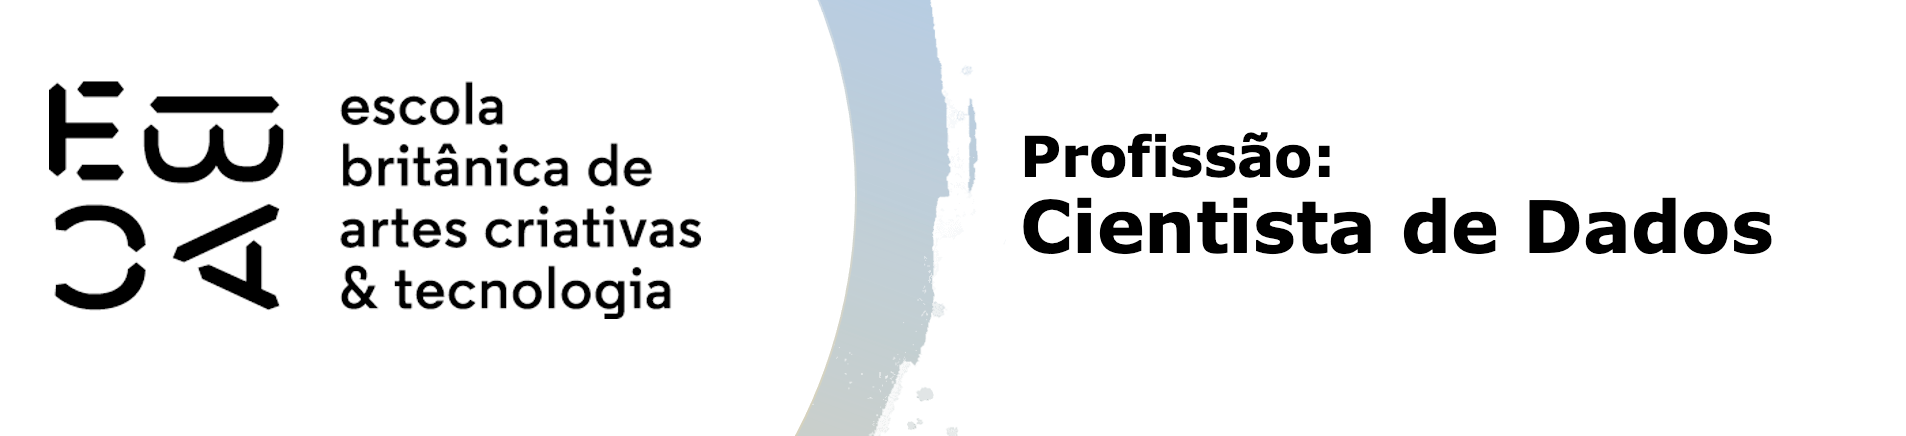

# Tarefa II

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_feather('./credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [53]:
# Separando os três últimos meses como safras de validação "out of time"
safra_validacao_oot = df['data_ref'].unique()[-3:]

# Filtrando os dados para obter apenas as safras de validação "out of time"
df_oot = df[df['data_ref'].isin(safra_validacao_oot)]

# Exibindo as primeiras linhas dos dados de validação "out of time"
print(df_oot.head())

         data_ref  index sexo posse_de_veiculo posse_de_imovel  qtd_filhos  \
600000 2016-01-01   8906    F                S               S           2   
600001 2016-01-01   5063    F                N               S           0   
600002 2016-01-01  16401    M                S               S           1   
600003 2016-01-01   6786    F                N               S           1   
600004 2016-01-01  13466    M                S               N           0   

         tipo_renda           educacao estado_civil tipo_residencia  idade  \
600000  Assalariado  Superior completo       Casado            Casa     38   
600001  Assalariado              Médio       Casado            Casa     55   
600002  Assalariado              Médio        União            Casa     39   
600003  Assalariado              Médio        União     Com os pais     31   
600004  Assalariado              Médio       Casado            Casa     27   

        tempo_emprego  qt_pessoas_residencia     renda    mau 

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [54]:
# Número total de linhas na base
total_linhas = len(df)

# Número de linhas para cada mês em data_ref
linhas_por_mes = df['data_ref'].value_counts().sort_index()

print("Número total de linhas na base:", total_linhas)
print("\nNúmero de linhas para cada mês em data_ref:")
print(linhas_por_mes)

# Descritiva básica para variáveis qualitativas
qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'educacao', 'estado_civil', 'tipo_residencia', 'mau']
print("\nDescritiva básica para variáveis qualitativas:")
print(df[qualitativas].describe(include='all'))

# Descritiva básica para variáveis quantitativas
quantitativas = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
print("\nDescritiva básica para variáveis quantitativas:")
print(df[quantitativas].describe())


Número total de linhas na base: 750000

Número de linhas para cada mês em data_ref:
data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64

Descritiva básica para variáveis qualitativas:
          sexo posse_de_veiculo posse_de_imovel educacao estado_civil  \
count   750000           750000          750000   750000       750000   
unique       2                2               2        5            5   
top          F                N               S    Médio       Casado   
freq    504580           457954          503692   506836       526472   

       tipo_residencia     mau  
count           750000  750000  
unique               6       2  
top               Casa   False  
freq            674294  691357  

D

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

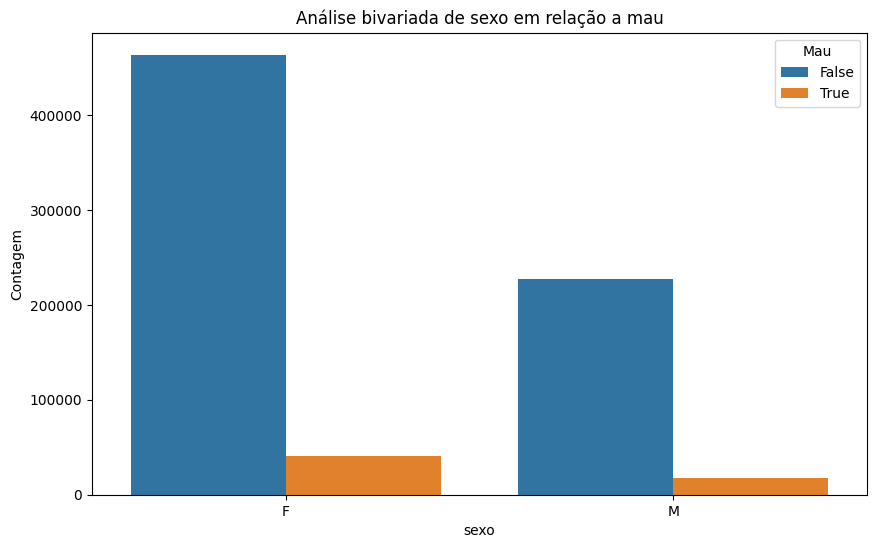

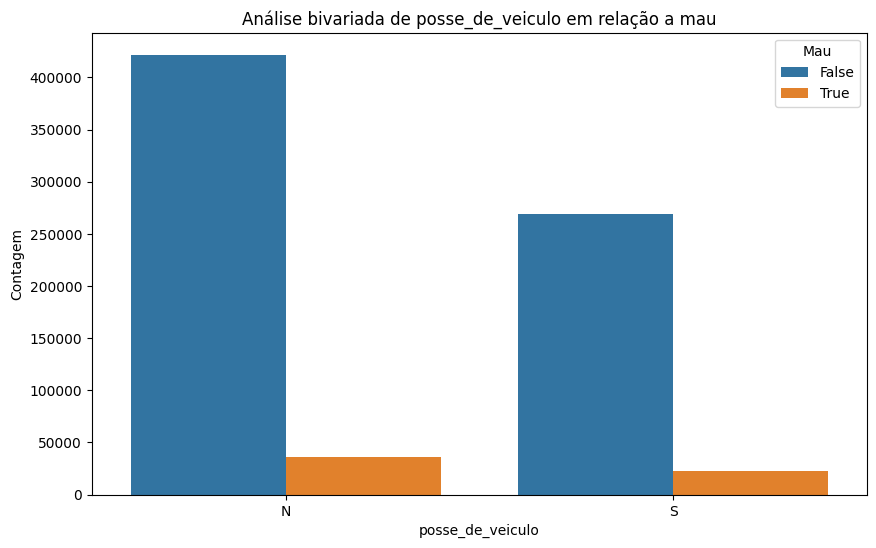

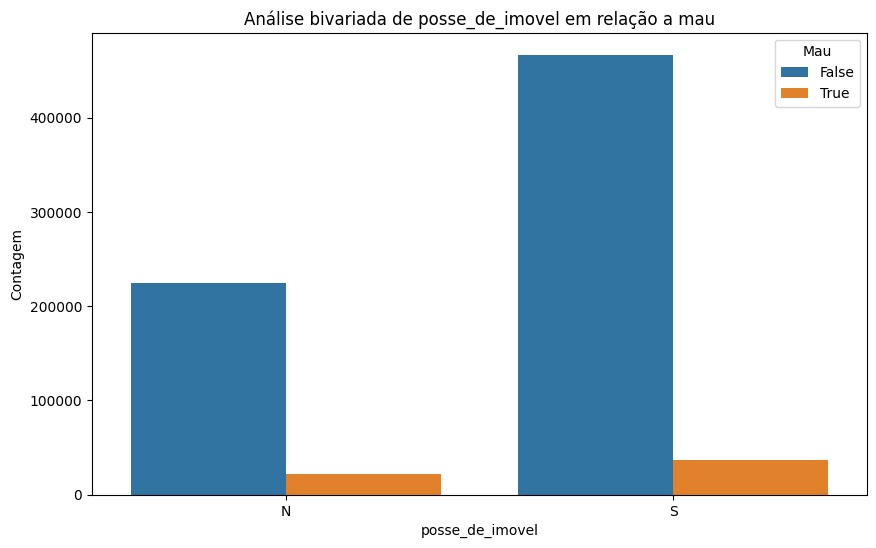

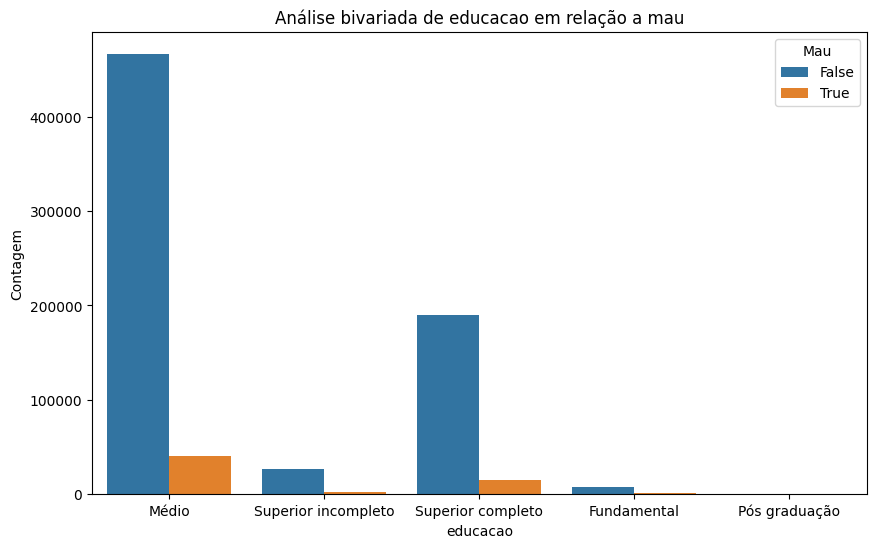

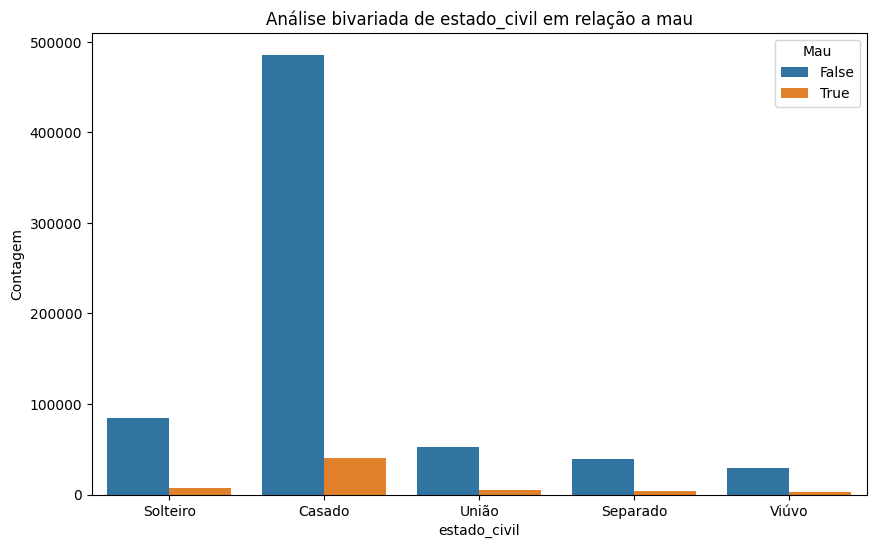

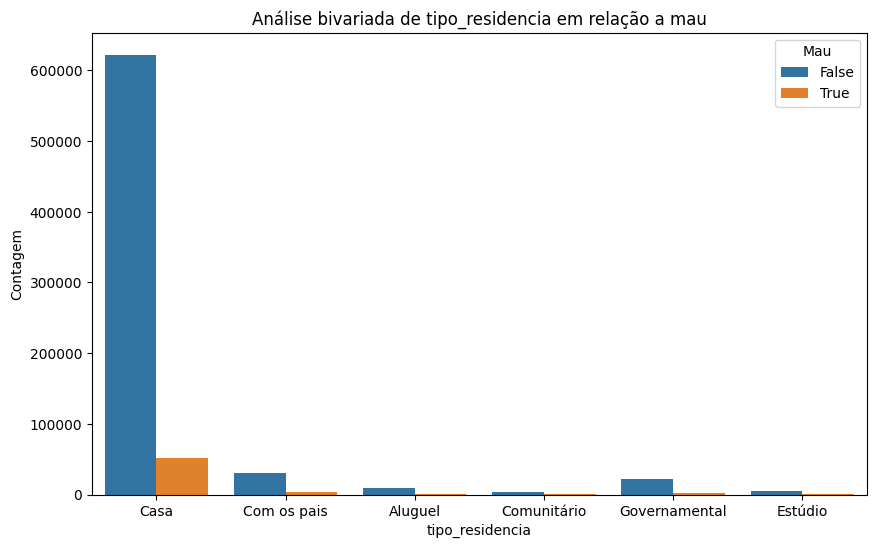

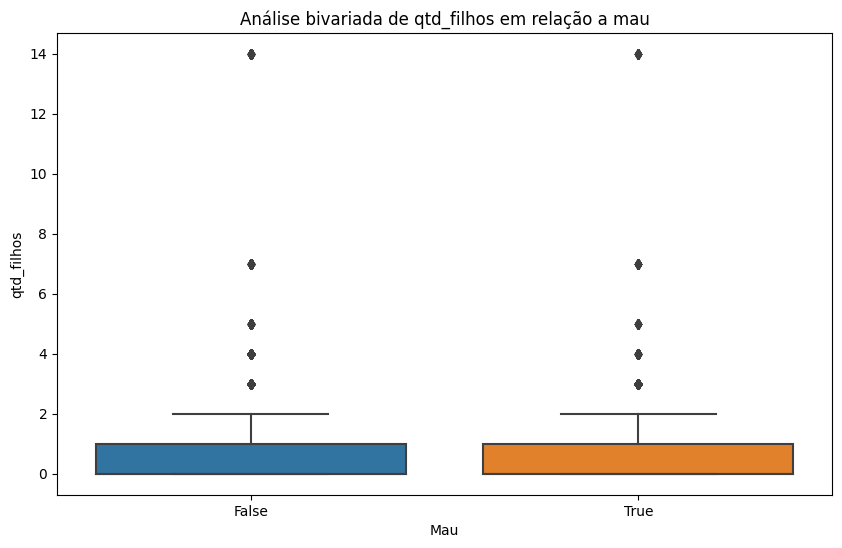

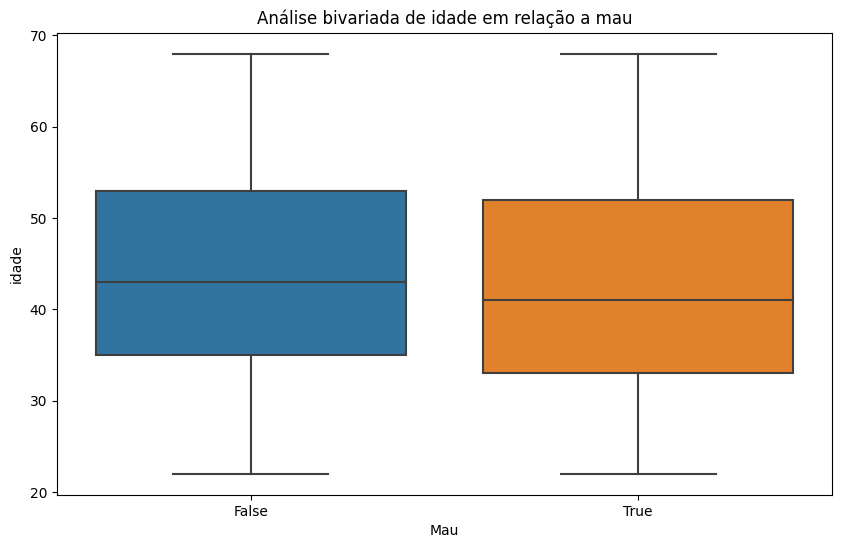

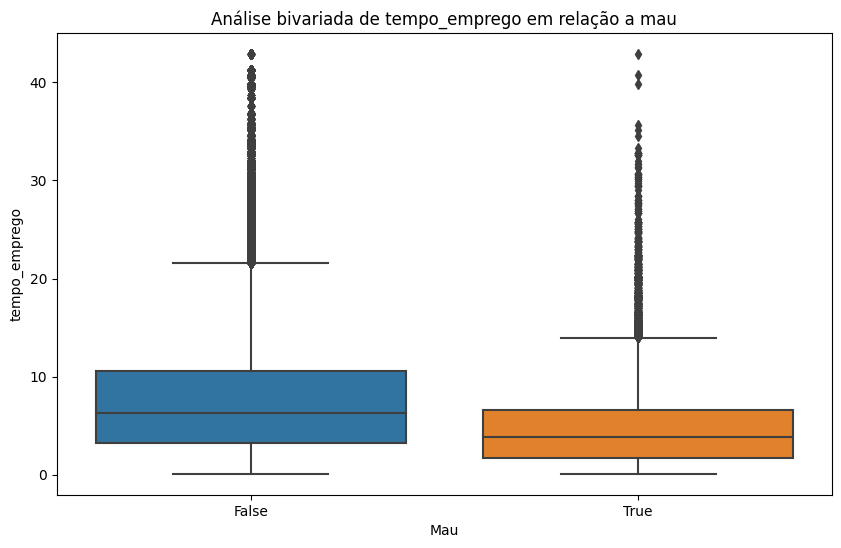

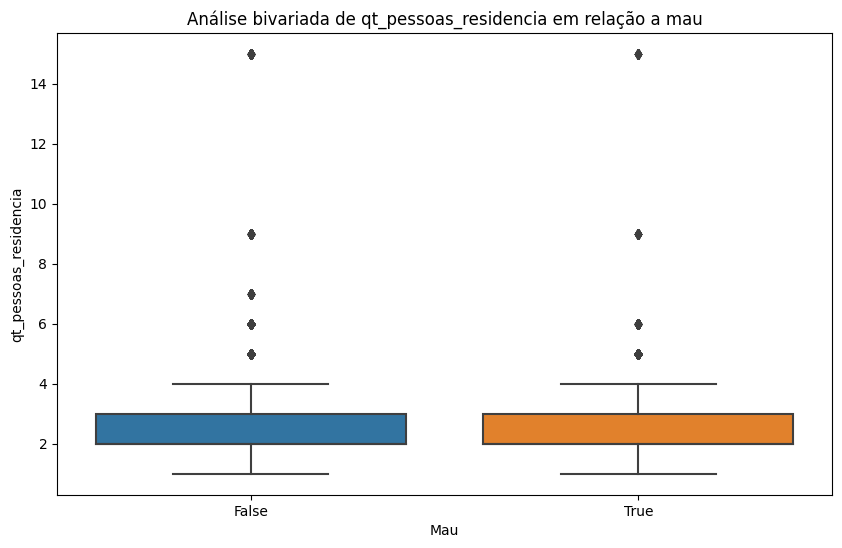

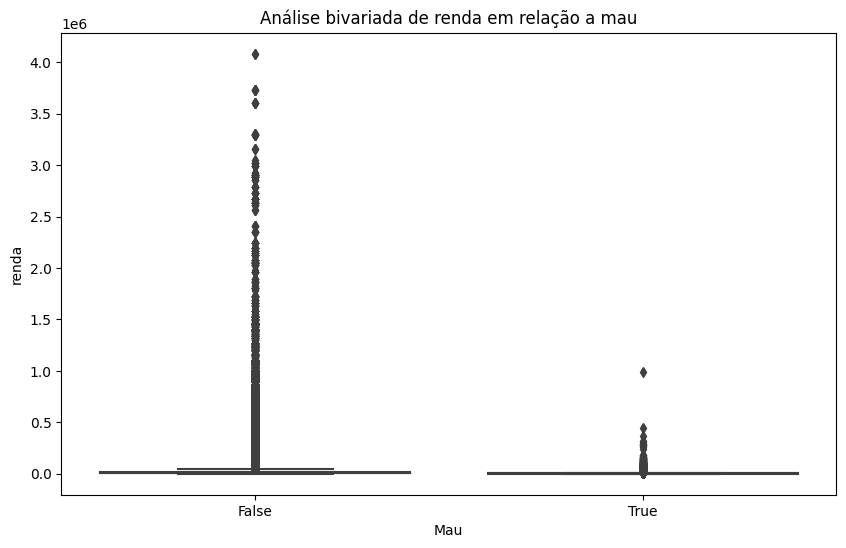

In [55]:
# Análise bivariada para variáveis qualitativas em relação à variável 'mau'
for col in qualitativas:
    if col != 'mau':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='mau', data=df)
        plt.title(f'Análise bivariada de {col} em relação a mau')
        plt.xlabel(col)
        plt.ylabel('Contagem')
        plt.legend(title='Mau', labels=['False', 'True'])
        plt.show()

# Análise bivariada para variáveis quantitativas em relação à variável 'mau'
for col in quantitativas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='mau', y=col, data=df)
    plt.title(f'Análise bivariada de {col} em relação a mau')
    plt.xlabel('Mau')
    plt.ylabel(col)
    plt.show()


## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [57]:
# Suprimindo todos os avisos
warnings.filterwarnings("ignore")

df = pd.read_feather('./credit_scoring.ftr')

# Tratando valores missings
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Criando e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Avaliando o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[138304      0]
 [ 11696      0]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96    138304
        True       0.00      0.00      0.00     11696

    accuracy                           0.92    150000
   macro avg       0.46      0.50      0.48    150000
weighted avg       0.85      0.92      0.88    150000



## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [70]:
# Calculando as métricas de avaliação
accuracy_train = model.score(X_train_scaled, y_train)
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Calculando KS para o conjunto de treinamento
probs_train = model.predict_proba(X_train_scaled)[:, 1]
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, probs_train)
ks_train = max(tpr_train - fpr_train)

# Calculando KS para o conjunto de validação (out-of-time)
probs_test = model.predict_proba(X_test_scaled)[:, 1]
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, probs_test)
ks_test = max(tpr_test - fpr_test)

# Calculando Gini a partir da AUC
gini_train = 2 * metrics.auc(fpr_train, tpr_train) - 1
gini_test = 2 * metrics.auc(fpr_test, tpr_test) - 1

# Arredondando os resultados para 2 casas decimais
accuracy_train = round(accuracy_train, 3)
accuracy_test = round(accuracy_train, 3)
ks_train = round(ks_train, 3)
ks_test = round(ks_test, 3)
gini_train = round(gini_train, 3)
gini_test = round(gini_test, 3)

print("Métricas de Avaliação - Base de Desenvolvimento:")
print("Acurácia:", accuracy_train)
print("KS:", ks_train)
print("Gini:", gini_train)

print()

print("Métricas de Avaliação - Base Out-of-Time:")
print("Acurácia:", accuracy_test)
print("KS:", ks_test)
print("Gini:", gini_test)

Métricas de Avaliação - Base de Desenvolvimento:
Acurácia: 0.922
KS: 0.416
Gini: 0.554

Métricas de Avaliação - Base Out-of-Time:
Acurácia: 0.922
KS: 0.413
Gini: 0.551
